# Исследовательский анализ данных

# Знакомство с задачей
Как исследовать поведение водителей на заправках, если вы — Яндекс? Обратиться к статистике Яндекс.Навигатора: узнать, на какую именно заправку заезжал водитель и сколько времени там провёл.
Ваши коллеги из Навигатора собрали необходимые данные и прислали их в таком виде:
Зашифрованное наименование сети АЗС (столбец name): вместо брендов — названия растений;
Уникальный идентификатор конкретной АЗС (столбец id) — в сети их много;
Время заезда на АЗС (столбец date_time) в формате ISO: 20190405T165358 означает, что водитель прибыл на заправку 5 апреля 2019 года в 16 часов 53 минуты 58 секунд по UTC.
Проведённое на АЗС время (столбец time_spent) в секундах.
Нужно ответить на вопрос, сколько в среднем времени тратят водители на заправку в каждой из сетей АЗС.

Прочитайте файл visits.csv, указав как разделитель знак табуляции: '\t', и сохраните результат в датафрейме data. Выведите его первые пять строк.
Путь к файлу: /datasets/visits.csv

In [7]:
import pandas as pd
data = pd.read_csv('visits.csv', sep='\t')
print(data.head(5))

         date_time        id  time_spent     name
0  20180406T165358  76144fb2        98.0  Василек
1  20180404T173913  76144fb2        15.0  Василек
2  20180403T172824  76144fb2       220.0  Василек
3  20180407T070441  76144fb2        19.0  Василек
4  20180404T132049  76144fb2        14.0  Василек


# Применяем сводные таблицы

Посчитайте среднее время заправки в секундах ('time_spent') для каждой из сетей ('name'), применяя метод pivot_table(). Датафрейм сохраните в переменной name_stat и выведите на экран.

In [9]:
name_stat = data.pivot_table(index='name', values='time_spent') 
print(name_stat)

             time_spent
name                   
Агератум     337.802721
Амарант      132.760012
Аммобиум     256.708042
Арктотис      73.879984
Астильба     376.143149
Бальзамин    134.508411
Бархатцы     145.300328
Бегония      163.200647
Белоцветник  100.818966
Василек      268.849897
Вербена      190.016594
Вероника     220.019402
Гацания      160.685185
Гвоздика     294.317308
Гейхера      167.445947
Гелихризум   290.138643
Георгина     166.615555
Годеция      113.958333
Диморфотека  406.161017
Доротеантус  263.568916
Ирис         179.931159
Календула    207.357323
Колокольчик  119.131564
Космос       164.867797
Крокус       349.031746
Лаватера     249.992844
Левкой       187.465606
Лобулярия     96.834350
Люпин        235.440937
Малопа        76.070543
Мальва       136.562234
Нарцисс       68.166758
Настурция    154.859694
Незабудка    120.362398
Немезия      186.535207
Обриета      141.777778
Петуния      265.780822
Пион         222.565523
Подснежник   180.286207
Роза         260

Таблицу - нельзя показывать менеджерам: они всё равно не поверят!
Сети АЗС «Нарцисс», «Арктотис» и «Малопа» имеют среднее время заправки около 70 секунд. Неправдоподобно мало.

# Базовая проверка данных
В работе с данными почти всегда вас ждут сюрпризы
- Почему-то выгрузили не те данные, или не всё, что есть;
- Ошибки в алгоритмах, считающих заезды: скажем, время заправки учли неверно.
- Не тот формат; например, вместо секунд записали минуты.
- Упущен какой-нибудь существенный факт. Так, водители могли заехать на нерабочую АЗС (а счётчик их учёл) и развернуться, не заправившись (счётчик зафиксировал очень короткое время).

Словом, в данных может быть всё, что угодно. Именно вы как аналитик ручаетесь за их реалистичность. Попробуйте оценить, насколько они достоверны. Начните с базовых проверок. Например, несложно ответить на вопросы:
Сколько всего заездов зафиксировано за время исследования?
Сколько АЗС?
Сколько заездов на одну АЗС в день?
Какие сети АЗС самые популярные?
... и самостоятельно либо с помощью коллег оценить, похожи ли результаты ваших расчётов на правду.
Базовая проверка может обнаружить проблему в данных. Или наоборот — свидетельствовать, что с ними всё в порядке. По крайней мере, пока.

1.
Сколько было заездов на АЗС? Сохраните число строк датафрейма в переменной total_visits. Результат выведите на экран так:
Количество заездов: ... 

In [10]:
total_visits = data.shape[0]
print('Количество заездов:', total_visits)

Количество заездов: 317104


2.
Найдите количество охваченных исследованием АЗС. 
Сохраните его в переменной total_stations, результат на экран выведите так:
Количество АЗС: ... 
Не удаляйте вывод из предыдущего задания. Идентификаторы АЗС записаны в столбце id.

In [11]:
total_visits = data.shape[0]
print('Количество заездов:', total_visits)
total_stations = len(data['id'].unique())
print('Количество АЗС:', total_stations)

Количество заездов: 317104
Количество АЗС: 471


3.
Выведите на экран дату и время первого и последнего заезда на АЗС через пробел. Без объявления новых переменных, примените методы min() и max() к значениям столбца data['date_time'] в аргументе функции print().
Вывод должен выглядеть так: 20180402T000008 20180408T235957.

In [12]:
print('Количество заездов:', total_visits)
total_stations = len(data['id'].unique())
print('Количество АЗС:', total_stations)
print(data['date_time'].min(), data['date_time'].max())

Количество заездов: 317104
Количество АЗС: 471
20180402T000008 20180408T235957


4.
Данные собраны за 7 дней — сохраните это значение в переменной total_days.
Найдите среднее число заездов на одну АЗС за 1 день. Сохраните результат вычислений в переменной station_visits_per_day и выведите её на экран в следующем виде:
Количество заездов на АЗС в сутки: ... 

In [13]:
station_visits_per_day = (total_visits/total_stations)/7
print('Количество заездов на АЗС в сутки:', station_visits_per_day)

Количество заездов на АЗС в сутки: 96.17955717318775


5.
Проверьте распределение числа заездов по сетям АЗС. Распечатайте топ-10 сетей с наибольшим числом заездов. В каждой строке должно быть название сети и число заездов.
Результат выведите в функции print().

In [14]:
print(data['name'].value_counts().sort_values(ascending=False).head(10))

Календула      85648
Василек        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: name, dtype: int64


# Гистограмма
На первый взгляд, данные выглядят корректно.
Однако есть гипотеза, что продолжительность заправки посчитана неверно: в некоторых сетях это время выглядит неправдоподобно маленьким. Напомним, вы считали среднее арифметическое. Оно не означает, что столько времени заправляются все водители: кто-то больше, кто-то меньше. Как представить себе значения, из которых рассчитано среднее, если в таблице тысячи строк? Не просматривать же каждую. Для ответа на этот вопрос строят гистограмму.
# Гистограмма — это график, который показывает, как часто в наборе данных встречается то или иное значение. 

Гистограмма объединяет числовые значения по диапазонам, то есть считает частоту значений в пределах каждого интервала. Её построение подобно работе знакомого вам метода value_counts(), подсчитывающего количество уникальных значений в списке. value_counts() группирует строго одинаковые величины и хорош для подсчёта частоты в списках с категориальными переменными.

1.
Выведите гистограмму значений времени, проведённого на АЗС.

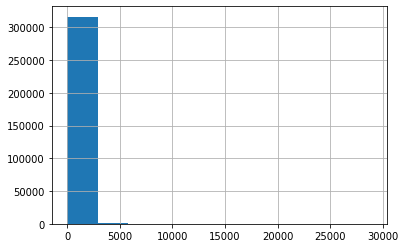

In [15]:
data['time_spent'].hist()

2.
Выведите гистограмму значений времени, проведённого на АЗС, с увеличенным до 100 числом столбцов

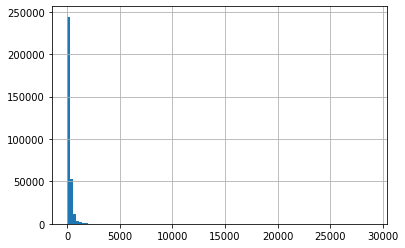

In [16]:
data['time_spent'].hist(bins=100)

3.
Выведите гистограмму значений времени, проведённого на АЗС, с увеличенным до 100 числом столбцов и диапазоном значений от 0 до 1500.

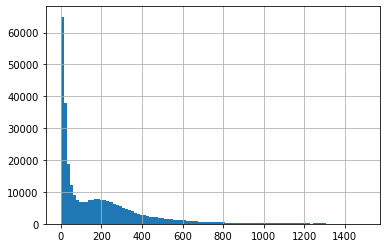

In [17]:
data['time_spent'].hist(bins=100, range = (0, 1500))

# Гистограмма для двух кубиков

1.
Будем бросать на стол 10 монет и считать количество выпавших орлов. Функции для имитации одного броска и подсчёта числа орлов в нескольких бросках уже в прекоде. Мы повторили эксперимент 1000 раз и сохранили результат в переменной df_experiments.
Постройте гистограмму полученных значений с диапазоном значений от 0 до 10 и количеством корзин 11.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc31538a20>]],
      dtype=object)

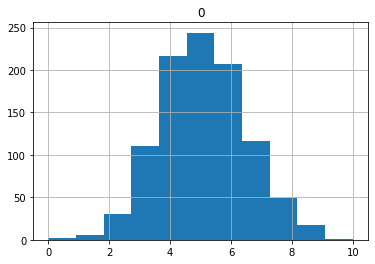

In [18]:
import random
import pandas as pd

# Функция, имитирующая один бросок монеты.
# От англ. coin - монета, flip - бросок монеты.
def coin_flip():
    # возможны два варианта:
    # - выпала решка, это +0 орлов
    # - выпал орёл, это +1 орёл
    score = random.randint(0, 1)
    return score


# Функция для суммирования числа орлов в нескольких бросках.
# Орёл и решка переводятся на английский как heads и tails.
# Аргумент repeat говорит, сколько раз бросать монету
# (от англ. repeat - повторение).
def flips_heads(repeat):
    total = 0
    for i in range(repeat):
        flip = coin_flip()
        total += flip
    return total


# Cоздаём пустой список. В него мы
# будем складывать результаты экспериментов.
experiments = []

for i in range(1000):
    score = flips_heads(10)

    # Напомним: функция append() добавляет новый
    # элемент score в конец списка experiments.
    experiments.append(score)

# превращаем список в DataFrame
df_experiments = pd.DataFrame(experiments)


# постройте гистограмму для df_experiments
df_experiments.hist(bins=11, range=(0, 10)) 


2.
Валерик каждый день едет на работу с тремя пересадками: сперва на автобусе до метро; затем по одной ветке, а потом по другой; и от метро добирается до работы на автобусе. Валерик знает, сколько продолжается поездка на каждом виде транспорта и пересадки, но вечно забывает учесть ожидание автобусов и поездов. Постройте гистограмму опозданий Валерика за 5 лет c параметром bins=10.
Будем считать, что автобус прибывает за время от 0 до 10 минут, а поезд — за время от 0 до 5 минут. В прекоде мы уже написали функции, которые это имитируют.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc31452a20>]],
      dtype=object)

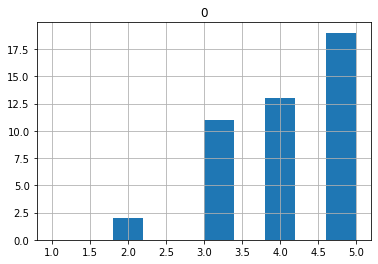

In [19]:
# Функция, имитирующая время ожидания автобуса.
# (от англ. bus - автобус, wait - ждать, time - время)
def bus_wait_time():
    return random.randint(0, 10)


# Функция, имитирующая время ожидания поезда в метро.
# (от англ. train - поезд, wait - ждать, time - время)
def train_wait_time():
    return random.randint(0, 5)


# Функция подсчёта полного опоздания за день.
# от англ. total - полный, итоговый, delay - задержка, опоздание
def total_delay():
    # обратите внимание, как в Python переносят длинные строки
    return (
        bus_wait_time()
        + train_wait_time()
        + train_wait_time()
        + bus_wait_time()
    )


# создайте пустой список
days = []

for i in range(365 * 5):
    delay = total_delay()
    days.append(delay)

    

# превращаем список в DataFrame
df_days = pd.DataFrame(days)

# постройте гистограмму для df_days
df_days.hist(bins=10, range=(1,5)) 


# Распределения

Наиболее частые (типичные, нормальные) значения оказываются посередине. А редкие — по краям. График симметричен и напоминает колокол. Такое распределение называется нормальное.

В общем случае любое отклонение от ожидаемого распределения — это сигнал, что данные не в порядке.
Ещё одно распределение, которое часто встречается — распределение Пуассона. Оно описывает число событий в единицу времени.

Форма распределения Пуассона зависит от числа событий. При небольших значениях распределение смещено влево, а с увеличением числа событий становится симметричным и уходит вправо.
Невозможно получить отрицательное число заходов в магазин, но при небольшом потоке посетителей есть шанс, что в определённую минуту придут 5 посетителей или не придёт ни одного. В таком случае распределение Пуассона обрезано на нуле и имеет длинный «хвост» в положительную сторону. При увеличении числа посетителей шанс не получить ни одного захода в магазин уже почти не реализуется, поэтому распределение Пуассона становится симметричным и стремится к нормальному.

# Диаграмма размаха
Описывая распределение, аналитики рассчитывают среднее арифметическое или медиану. С соответствующими методами mean() и median() вы познакомились в курсе по предобработке данных. Однако помимо медианы и среднего, важно знать характерный разброс — то, какие значения оказались вдали от среднего, и насколько их много.

амое простое, что можно посчитать для оценки разброса — это минимальное и максимальное значения. Такое описание не всегда точно, подвержено влиянию выбросов. Гораздо более устойчивая оценка — межквартильный размах.

Квартили (от латинского quartus — «четвёртый») разбивают упорядоченный набор данных на четыре части. Первый квартиль Q1 — число, отделяющее первую четверть выборки: 25% элементов меньше, а 75% — больше него. Медиана — второй квартиль Q2, половина элементов больше и половина меньше неё. Третий квартиль Q3 — это отсечка трёх четвертей: 75% элементов меньше и 25% элементов больше него. Межквартильный размах — это расстояние между Q1 и Q3.

Увидеть медиану и квартили в Python можно на специальном графике. Его называют диаграмма размаха или ящик с усами.
image
«Ящик» ограничен первым и третьим квартилями. Внутри ящика обозначают медиану.
«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильным размахам (сокращённо IQR, от англ. interquartile range, «межквартильный размах»). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если правый «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и левого уса.


# Задача
Нарисуйте диаграмму размаха для data, ограничив диапазон по вертикали значениями -100 и 1000.

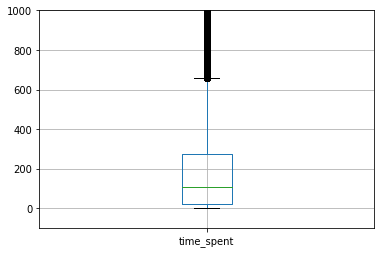

In [24]:
import matplotlib.pyplot as plt
data = pd.read_csv ('visits.csv', sep='\t')
plt.ylim(-100, 1000)
data.boxplot()

Вывод: большая часть значенийлежит в диапазоне до 300

Методом describe() получите характерные значения таблицы data. Результат выведите на экран.

In [25]:
data.describe()

,time_spent
count,317104.000000
mean,203.382294
std,395.754791
min,0.000000
25%,19.000000
50%,108.000000
75%,274.000000
max,28925.000000


- count    3.0 # количество наблюдений в наборе данных
- mean     2.0 # среднее арифметическое
- std      1.0 # стандартное отклонение
- min      1.0 # минимальное значение
- 25%      1.5 # первый квартиль
- 50%      2.0 # медиана или второй квартиль
- 75%      2.5 # третий квартиль
- max      3.0 # максимальное значение
- dtype: float64 # тип данных 

Стандартное отклонение — единственное значение, которого мы ещё не касались. Оно характеризует разброс величин, показывает, насколько значения в выборке отличаются от среднего арифметического.
Бывает, что именно стандартное отклонение позволяет понять природу распределения и определить, насколько значения однородны. Выборка, где все значения близки к среднему, будет охарактеризована малым стандартным отклонением. Если же стандартное отклонение велико, в наборе данных могут быть серьёзные аномалии или выбросы.

# Срезы данных и поиск авиабилетов

1.
Выберите дешёвые авиабилеты — те у которых цена меньше максимальной в полтора раза или ещё ниже.
Выведите на экран полученную выборку.

In [26]:
df = pd.DataFrame(
    {
        'From': [
            'Moscow',
            'Moscow',
            'St. Petersburg',
            'St. Petersburg',
            'St. Petersburg',
        ],
        'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
        'Is_Direct': [False, True, False, False, True],
        'Has_luggage': [True, False, False, True, False],
        'Price': [21032, 19250, 19301, 20168, 31425],
        'Date_From': [
            '01.07.19',
            '01.07.19',
            '04.07.2019',
            '03.07.2019',
            '05.07.2019',
        ],
        'Date_To': [
            '07.07.19',
            '07.07.19',
            '10.07.2019',
            '09.07.2019',
            '11.07.2019',
        ],
        'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
        'Travel_time_from': [995, 230, 605, 365, 255],
        'Travel_time_to': [350, 225, 720, 355, 250],
    }
)
print(df[df['Price']  * 1.5  < df['Price'].max() ]) # впишите нужное условие

             From         To  Is_Direct  Has_luggage  Price   Date_From  \
1          Moscow       Rome       True        False  19250    01.07.19   
2  St. Petersburg       Rome      False        False  19301  04.07.2019   
3  St. Petersburg  Barcelona      False         True  20168  03.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
1    07.07.19       S7               230             225  
2  10.07.2019  Finnair               605             720  
3  09.07.2019    Swiss               365             355  


2.
Выберите строки, где значения столбца 'Travel_time_from' больше или равно 365, или значения 'Travel_time_to' меньше 250. Результат выведите на экран.

In [27]:
print(df[ (df['Travel_time_from'] >= 365) | (df['Travel_time_to']< 250)]) 

             From         To  Is_Direct  Has_luggage  Price   Date_From  \
0          Moscow       Rome      False         True  21032    01.07.19   
1          Moscow       Rome       True        False  19250    01.07.19   
2  St. Petersburg       Rome      False        False  19301  04.07.2019   
3  St. Petersburg  Barcelona      False         True  20168  03.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
0    07.07.19  Belavia               995             350  
1    07.07.19       S7               230             225  
2  10.07.2019  Finnair               605             720  
3  09.07.2019    Swiss               365             355  


3.
Выберите строки, где:
- Полёт с пересадкой;
- Возвращение до 8 июля (ни 9, ни 10, ни 11 июля).
Результат выведите на экран.

In [29]:
print(df[(df['Is_Direct'] == False) & (~df['Date_To'].isin(('09.07.2019', '10.07.2019', '11.07.2019')))]) 

     From    To  Is_Direct  Has_luggage  Price Date_From   Date_To  Airline  \
0  Moscow  Rome      False         True  21032  01.07.19  07.07.19  Belavia   

   Travel_time_from  Travel_time_to  
0               995             350  


# Срезы данных методом query()

Необходимое условие для среза записывается в строке, которую передают как аргумент методу query(). А его применяют к датафрейму. В результате получаем нужный срез.

1.
Выберите строки, где: Has_luggage равно False и Airline не равно ни S7, ни Rossiya. Напечатайте полученную выборку на экране.

In [30]:
print(df.query('Has_luggage == False and Airline not in ("S7", "Rossiya")'))

             From    To  Is_Direct  Has_luggage  Price   Date_From  \
2  St. Petersburg  Rome      False        False  19301  04.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
2  10.07.2019  Finnair               605             720  


2.
Выберите строки, где Airline равно "Belavia", "S7" или "Rossiya", при этом 'Travel_time_from' меньше переменной под названием max_time. Напечатайте полученную выборку на экране.

In [32]:
max_time = 300
print(df.query(' Airline in("Belavia", "S7","Rossiya") and Travel_time_from < @max_time'))

             From         To  Is_Direct  Has_luggage  Price   Date_From  \
1          Moscow       Rome       True        False  19250    01.07.19   
4  St. Petersburg  Barcelona       True        False  31425  05.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
1    07.07.19       S7               230             225  
4  11.07.2019  Rossiya               255             250  


# Срезы в действии

1.
Узнайте, на каких АЗС водители проводят больше всего времени. Выведите топ-10 строк с самой долгой заправкой.

In [33]:
print( data.sort_values(by = ['time_spent'], ascending=False).head(10))

              date_time        id  time_spent      name
114797  20180402T055708  3c1e4c52     28925.0   Василек
27147   20180406T080254  4b5f2af5     28519.0   Немезия
60547   20180408T000002  cf1ba8a5     28292.0   Василек
19042   20180408T204208  5410e876     23696.0   Василек
118597  20180408T165020  3c1e4c52     21184.0   Василек
118058  20180402T111333  3c1e4c52     20359.0   Василек
114406  20180408T083722  3c1e4c52     19886.0   Василек
132164  20180405T160745  627ea5e3     19445.0    Левкой
281360  20180406T180459  d0c0928d     18614.0      Пион
165326  20180402T230204  3af3bb71     18569.0  Агератум


2.
Сохраните срез данных с id == "3c1e4c52" в переменной sample (англ. «выборка, проба»). Выведите количество заездов на эту АЗС.

In [34]:
sample = data.query('id == "3c1e4c52"')
print(len(sample))

5814


3.
Посмотрим, как они распределены, отличаются ли от остальных данных. Вспомните, как выглядела гистограмма по всему набору данных.
Постройте гистограмму времён заезда на все АЗС. И аналогичную гистограмму для выбранной АЗС (мы уже сохранили данные в переменную sample). Для обеих гистограмм задайте диапазон 0-1500 секунд и 100 корзин.

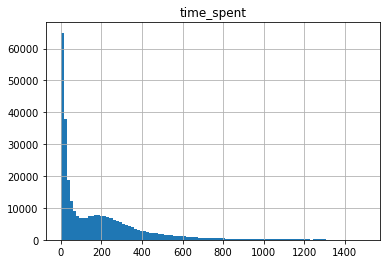

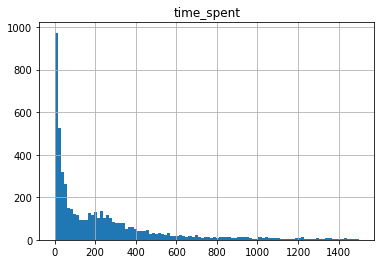

In [35]:
data.hist("time_spent", range = (0, 1500), bins=100)
plt.show()
sample.hist("time_spent", range = (0, 1500), bins=100)
plt.show()

# Вывод
Заправки продолжительностью 600 секунд — уже редки. Дольше 800 секунд почти не заправляются. А на участке более 1300 секунд гистограмма сливается с нулём (это не значит, что там ровно 0, но таких заправок единицы).
Примем верхнюю границу в 1000 секунд. Это число кажется разумным: дольше заправляются редко. Отбросив значения больше 1000, мы не потеряем много данных. Да и вряд ли водители тратят на заправку больше 1000 секунд (16 минут).
Решено. Продолжаем работать с наблюдениями, удовлетворяющими условию: data.query('time_spent < 1000')

# Работа с датой и временем
В курсе по предобработке вы познакомились с методом to_datetime(), который переводит строки в даты. Напомним, что в аргументе format метода to_datetime() указывают специальные обозначения, порядок которых соответствует порядку чисел в строке с датой:
- %d — день месяца (от 01 до 31)
- %m — номер месяца (от 01 до 12)
- %Y — четырёхзначный номер года (например, 2019)
- Z или T — стандартный разделитель даты и времени
- %H — номер часа в 24-часовом формате
- %I — номер часа в 12-часовом формате
- %M — минуты (от 00 до 59)
- %S — секунды (от 00 до 59)
Пора научиться:
Округлять даты;
Добывать отдельные компоненты из дат, например, день недели;
«Сдвигать» даты в другие часовые пояса.
О том, что операции предстоит выполнять именно с датами, аналитик сообщает Pandas отдельно, через атрибут dt (от англ. date time). Атрибут dt указывает, что тип данных, к которым будут применены методы, — datetime. А значит, Pandas не примет их за строки или числа.
Чтобы округлить время, применяют метод dt.round() (англ. round, «округлять»). В качестве параметра ему передают строку с шагом округления в часах, днях, минутах или секундах:
- 'D' — day (от англ. «день»)
- 'H' — hour (от англ. «час»)
- 'min' или 'T' — minute (от англ. «минута»)
- 'S' — second (от англ. «секунда»)

Чтобы быть уверенными в том, что время будет округлено к бóльшему значению, обращаются к методу dt.ceil() (от англ. ceiling — «потолок»). К меньшему значению, «вниз», округляют методом dt.floor() (англ. floor, «пол»).

Номер дня в неделе находят методом dt.weekday (англ. weekday, «будний день»). Понедельник — день под номером 0, а воскресенье — шестой день.

Иногда нужно переводить время в другой часовой пояс. За временные сдвиги отвечает pd.Timedelta() (от англ. time delta — «дельта времени, перепад во времени»). Количество часов передают в параметре: (hours=10).

1.
Переведите значения в столбце 'date_time' в формат даты.
В аргументе format метода to_datetime() передайте строку со значениями года, месяца, дня и времени, чтобы получить запись вида: 2018-04-06T16:53:58. Результат сохраните в столбце 'date_time'.
Первые 5 строк таблицы data выведите на экран.

In [36]:
data['date_time'] = pd.to_datetime(data['date_time'], format = '%Y-%m-%dT%H:%M:%S') 
print(data.head(5))

            date_time        id  time_spent     name
0 2018-04-06 16:53:58  76144fb2        98.0  Василек
1 2018-04-04 17:39:13  76144fb2        15.0  Василек
2 2018-04-03 17:28:24  76144fb2       220.0  Василек
3 2018-04-07 07:04:41  76144fb2        19.0  Василек
4 2018-04-04 13:20:49  76144fb2        14.0  Василек


2.
Напомним, что в датафрейме записано время UTC. Московское рассчитывают как UTC + 3 часа.
Создайте столбец data['local_time'] и сохраните в нём сдвинутую на +3 часа дату и время из столбца data['date_time']. Напечатайте первые 5 строк таблицы data.

In [39]:
data['date_time'] = pd.to_datetime(data['date_time'], format = '%Y-%m-%dT%H:%M:%S') 
data['local_time'] = data['date_time'] + pd.Timedelta(hours=3)
print(data.head(5))

            date_time        id  time_spent     name          local_time
0 2018-04-06 16:53:58  76144fb2        98.0  Василек 2018-04-06 19:53:58
1 2018-04-04 17:39:13  76144fb2        15.0  Василек 2018-04-04 20:39:13
2 2018-04-03 17:28:24  76144fb2       220.0  Василек 2018-04-03 20:28:24
3 2018-04-07 07:04:41  76144fb2        19.0  Василек 2018-04-07 10:04:41
4 2018-04-04 13:20:49  76144fb2        14.0  Василек 2018-04-04 16:20:49


3.
Создайте столбец data['date_hour'] с московским временем заезда на АЗС, округлённым до 1 часа методом dt.round(). Напечатайте первые 5 строк.

In [40]:
data['date_hour']  = data['local_time']. dt.round('1H')
print(data.head(5))

            date_time        id  time_spent     name          local_time  \
0 2018-04-06 16:53:58  76144fb2        98.0  Василек 2018-04-06 19:53:58   
1 2018-04-04 17:39:13  76144fb2        15.0  Василек 2018-04-04 20:39:13   
2 2018-04-03 17:28:24  76144fb2       220.0  Василек 2018-04-03 20:28:24   
3 2018-04-07 07:04:41  76144fb2        19.0  Василек 2018-04-07 10:04:41   
4 2018-04-04 13:20:49  76144fb2        14.0  Василек 2018-04-04 16:20:49   

            date_hour  
0 2018-04-06 20:00:00  
1 2018-04-04 21:00:00  
2 2018-04-03 20:00:00  
3 2018-04-07 10:00:00  
4 2018-04-04 16:00:00  


# Графики

- Сделайте срез из данных по АЗС с id == "3c1e4c52". Сохраните в переменной sample.
- Постройте график зависимости продолжительности заправки от времени заезда. За основу возьмите соответствующие столбцы 'time_spent' и 'local_time'.
- Каждый заезд должен выглядеть как отдельная точка, не соединённая линиями с другими точками. Для этого вам потребуется маркер 'o'.
- Ограничьте график значениями до 1000 секунд. Нарисуйте линии сетки. Увеличьте размер графика до 12 дюймов по горизонтали и 6 по вертикали.

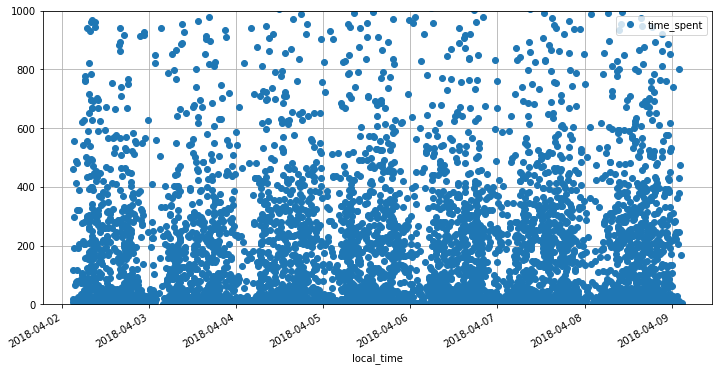

In [41]:
sample = data.query('id == "3c1e4c52"')
sample.plot(x='local_time', y='time_spent', style='o', ylim=(0, 1000),  grid=True, figsize=(12, 6))

# Вывод
На графике видна структура с провалами плотности в районе ночных часов. Это кажется правдоподобным: машин и, как следствие, заправок ночью меньше

Подозрительно коротких заездов (с продолжительностью менее 100 секунд) много в любое время суток. Хотя график строили по срезу, данных будто не стало меньше. Точки сливаются, делать по ним уверенные выводы трудно. Попробуем улучшить визуальное представление группировкой данных.

# Задача 
Постройте график числа заездов на АЗС с id == "3c1e4c52" по данным сводной таблицы с аргументами index='date_hour', values='time_spent'. Параметру aggfunc установите значение 'count'.
Добавьте на график сетку. Задайте размер 12*5 дюймов в параметре figsize.

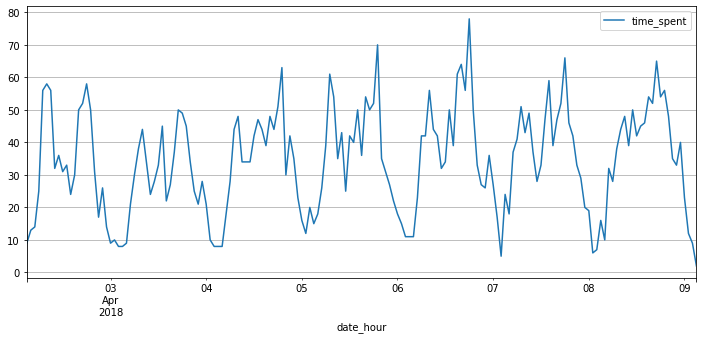

In [42]:
(
    data.query('id == "3c1e4c52"')
    .pivot_table(index='date_hour', values='time_spent', aggfunc = 'count')
    .plot(grid=True, figsize=(12, 5))
) 

Обратите внимание, что даже без фильтра 'time_spent < 1000' медиана дала среднюю продолжительность заправки примерно в 200 секунд. Медиана устойчива к выбросам, но всё же не безупречна: пик более 800 секунд в ночь со 2-го на 3-е апреля выглядит аномальным значением.

# Помечаем срез данных

Продолжительность заправки около 0 секунд всё ещё выглядит необъяснимо странной. Неужели такие заезды придётся отбросить? Мы уже сделали это с подозрительно долгими заправками, признав их выбросами. Однако сверхкоротких заездов гораздо больше, чем очень долгих. Если мы от них избавимся, то наверняка сильно исказим данные.

1.
Создайте столбец data['too_fast'] (англ. too fast, «слишком быстрый»), со значениями:
True — если время заезда менее 60 секунд
False — если от 60 секунд
Напечатайте первые 5 строк data.

In [44]:
data['too_fast'] = data['time_spent'] < 60 
print(data.head(5))

            date_time        id  time_spent     name          local_time  \
0 2018-04-06 16:53:58  76144fb2        98.0  Василек 2018-04-06 19:53:58   
1 2018-04-04 17:39:13  76144fb2        15.0  Василек 2018-04-04 20:39:13   
2 2018-04-03 17:28:24  76144fb2       220.0  Василек 2018-04-03 20:28:24   
3 2018-04-07 07:04:41  76144fb2        19.0  Василек 2018-04-07 10:04:41   
4 2018-04-04 13:20:49  76144fb2        14.0  Василек 2018-04-04 16:20:49   

            date_hour  too_fast  
0 2018-04-06 20:00:00     False  
1 2018-04-04 21:00:00      True  
2 2018-04-03 20:00:00     False  
3 2018-04-07 10:00:00      True  
4 2018-04-04 16:00:00      True  


2.
Выведите среднее значение по столбцу 'too_fast

In [45]:
data['too_fast'] = data['time_spent'] < 60
print(data['too_fast'].mean())

0.42213910893586964


3.
Найдите долю аномально быстрых заправок для разных АЗС (т.е. разных id) — обратитесь к сводным таблицам. Создайте переменную too_fast_stat, в которой для каждого id будет доля быстрых заправок. Выведите первые 5 строк.

In [46]:
too_fast_stat = data.pivot_table(index = 'id', values = 'too_fast' )
print(too_fast_stat.head(5))

          too_fast
id                
00ca1b70  0.250000
011f7462  0.637489
015eaddd  0.726190
0178ce70  0.211538
018a83ef  0.510269


4.
Постройте гистограмму значений too_fast_stat. Поделите значения на 30 корзин.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc3624b048>]],
      dtype=object)

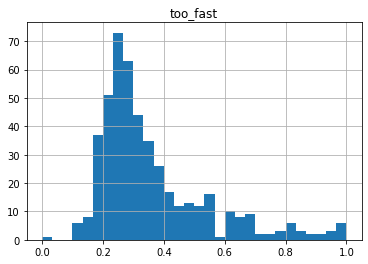

In [47]:
too_fast_stat.hist(bins = 30)

5.
Проблема сверхкоротких заправок зафиксирована. Проделаем то же самое с аномально долгими заправками.
Создайте столбец data['too_slow'], в котором будут значения:
True — если время заезда более 1000 секунд;
False — если время заезда менее или равно 1000 секундам.
Постройте гистограмму доли too_slow по разным АЗС (группируя по id). Данные для гистограммы делите на 30 корзин.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc367351d0>]],
      dtype=object)

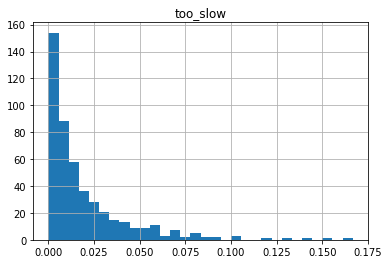

In [48]:
data['too_slow'] = data['time_spent']> 1000
too_slow_stat = data.pivot_table(index='id', values='too_slow')
too_slow_stat.hist(bins = 30)

# Сохраняем результаты
Подведём итоги исследования.
Бывает, что заправляются долго. Причём повсюду. Только доля таких заправок невелика. В гистограммах заездов на АЗС с рекордно долгими заправками — ничего особенного, выглядят они ожидаемо.
Мы решили отбросить слишком долгие заезды (более 1000 секунд), а для надёжности вместо среднего арифметического времени рассчитывать медианное. Тогда эти заезды не исказят оценку типичной продолжительности заправки.
А вот с короткими заездами всё не так радужно. Их гораздо больше. Есть АЗС, где коротких заправок большинство, а то и все 100%. Что-то здесь не то.
Ошибка в исходных данных? Сформулируем проблему, чтобы упростить поиск потенциальной ошибки в алгоритме выгрузки данных. Правильное сообщение об ошибке, или баг-репорт (от англ. bug report, «сообщение об ошибке»), должно чётко объяснять, в чём именно ошибка и как её найти.
Мы часами исследовали данные, и хорошо понимаем суть проблемы. Коллеги, отвечающие за выгрузку, ничего этого не знают. Поэтому нужно чётко формулировать, где мы видим проблему. Для этого не подходит описание «слишком быстрые» или «пик около 0». Нужно быть точнее.
Мы видели гистограмму и решили, что проблемные заезды — те, что короче 60 секунд. Это и нужно сказать.
Следует сообщить, что мы видим проблему в том, что таких заправок слишком много (если бы такие заезды составляли 1% от всех данных, мы бы не сочиняли баг-репорт).
Облегчим работу коллег, сфокусируем их внимание на самой проблемной АЗС — там будет легче отловить ошибку. Или понять, что это не ошибка, а какое-то пока неведомое явление.

Найдём эту проблемную АЗС. Напомним, что в прошлом уроке мы уже считали долю аномально быстрых заправок для каждой АЗС:

In [49]:
print(too_fast_stat.sort_values('too_fast', ascending=False).head())

          too_fast
id                
c96c61cd  1.000000
c527c306  1.000000
5372547e  1.000000
792b6ded  0.996253
bd1d0bb0  0.982044


Таких АЗС, где 100% заездов аномально быстрые, оказалось целых три! Наверное, их id нужно передать коллегам, чтобы они искали ошибку. Но сперва посмотрим сами.
Методом describe() оценим данные первой АЗС — id 'c96c61cd':

In [50]:
data.query('id == "c96c61cd"').describe() 

,time_spent
count,1.0
mean,5.0
std,NaN
min,5.0
25%,5.0
50%,5.0
75%,5.0
max,5.0


Всего 1 заезд. Это неудачный баг-репорт, ведь АЗС с одним заездом странная сама по себе. Если на ней и была какая-то проблема, не факт, что она массовая.
Для баг-репорта нужна «полноценная» АЗС с достаточным числом аномально быстрых заездов. Проверив аналогично следующие id в списке, мы обнаружили, что нормальная статистика есть только по АЗС '792b6ded':

In [51]:
data.query('id == "792b6ded"').describe() 

,time_spent
count,4270.000000
mean,5.448712
std,8.597126
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,228.000000


Больше 4000 заездов, но почти все очень-очень короткие. 75% укладывается в 5 секунд. Первый квартиль составляет 2 секунды. Это значит, что как минимум 25% укладывается в 2 секунды.
Это очень удачный пример для баг-репорта. Можно передать как сам id, так и статистику по этой АЗС.

# Срез по данным из внешнего словаря
В прошлой теме вы обнаружили заправки короче 60 секунд и узнали, как они распределены по АЗС. Выяснили, что на некоторых «плохих» АЗС сверхбыстрых заездов очень много. Оставив станции с такими заездами в наборе данных, рискуем некорректно оценить продолжительность заправки. Лучше избавиться от них.

1.
Выберите из таблицы data данные только по АЗС с долей «аномально быстрых» заездов меньше 50%. Сравните число «хороших» АЗС с количеством всех АЗС. Решите задачу в несколько шагов:
- Выберите id АЗС, чья доля «аномально быстрых» заездов меньше 50%. Сохраните их id в переменной good_ids. Получите id «хороших» АЗС, применив query() к столбцу too_fast_stat. Чтобы вспомнить название нужного вам столбца, выполните промежуточное действие — напечатайте таблицу too_fast_stat.
- Отфильтруйте data по вхождению в good_ids.index. Результат сохраните в good_data.
- Распечатайте число строк в data, а затем и число строк в good_data.

In [52]:
too_fast_stat = data.pivot_table(index='id', values='too_fast')

good_ids = too_fast_stat.query(' too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
print(len(data))
print(len(good_data))

317104
229095


2.
У нас теперь остались только «хорошие» АЗС. Надо избавить их статистику от аномальных заездов. И то, что получится, будем считать пригодными для принятия решения данными.
Мы условились, что нормальная заправка должна длиться не меньше 60, но не больше 1000 секунд. Оставьте в good_data только данные с нормальной продолжительностью заправки. Результат сохраните в той же переменной. Напечатайте число строк в обновлённой good_data.

In [53]:
good_data = good_data.query(' 60 <= time_spent <= 1000')
print(good_data.shape[0])

154601


3.
Вы столько всего выкинули! А что-нибудь от этого поменялось? Уточните, какой стала типичная продолжительность заправки на АЗС.
Примените pivot_table к датафрейму good_data и составьте рейтинг, где каждой АЗС (id) соответствует медианное время заправки. Сводную таблицу сохраните в good_stations_stat. Постройте гистограмму good_stations_stat c 50 корзинами.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc362ffd30>]],
      dtype=object)

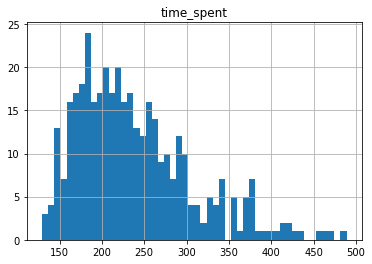

In [54]:
good_stations_stat = good_data.pivot_table( index = 'id', values = 'time_spent', aggfunc = 'median')
good_stations_stat.hist(bins = 50)

4.
Всё готово для составления рейтинга сетей АЗС.
Примените pivot_table к good_data и постройте рейтинг, где каждому названию сети АЗС соответствует медианное время заправки. Сводную таблицу сохраните в good_stat.
Выведите good_stat, отсортировав по возрастанию времени.

In [55]:
good_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median'
)

print(good_stat.sort_values('time_spent'))

             time_spent
name                   
Белоцветник       154.0
Бальзамин         158.0
Незабудка         161.0
Колокольчик       161.0
Обриета           167.0
Функия            171.5
Гацания           178.5
Аммобиум          180.5
Пион              180.5
Бархатцы          181.5
Мальва            182.0
Ирис              185.0
Арктотис          185.0
Люпин             186.0
Амарант           187.5
Хризантема        188.0
Тюльпан           190.0
Ромашка           191.0
Бегония           195.0
Вербена           199.0
Гейхера           204.0
Вероника          212.0
Левкой            212.5
Подснежник        218.5
Доротеантус       220.0
Диморфотека       224.0
Немезия           226.0
Гвоздика          229.0
Малопа            229.0
Календула         254.0
Крокус            257.5
Василек           264.0
Космос            267.0
Георгина          279.0
Лаватера          282.0
Агератум          309.0
Роза              315.0
Петуния           319.5
Гелихризум        342.0
Астильба        

# Добавляем столбец (продолжение)

# Задача
Добавьте в stat столбец good_time_spent со значениями времени заправки в сети АЗС из good_stat. Распечатайте все значения stat.

In [57]:
stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median'
)

stat['good_time_spent'] = good_stat['time_spent']
print(stat)

             time_spent  good_time_spent
name                                    
Агератум     337.802721            309.0
Амарант      132.760012            187.5
Аммобиум     256.708042            180.5
Арктотис      73.879984            185.0
Астильба     376.143149            423.0
Бальзамин    134.508411            158.0
Бархатцы     145.300328            181.5
Бегония      163.200647            195.0
Белоцветник  100.818966            154.0
Василек      268.849897            264.0
Вербена      190.016594            199.0
Вероника     220.019402            212.0
Гацания      160.685185            178.5
Гвоздика     294.317308            229.0
Гейхера      167.445947            204.0
Гелихризум   290.138643            342.0
Георгина     166.615555            279.0
Годеция      113.958333              NaN
Диморфотека  406.161017            224.0
Доротеантус  263.568916            220.0
Ирис         179.931159            185.0
Календула    207.357323            254.0
Колокольчик  119

# Объединяем данные из двух таблиц

Примените pivot_table() и получите из good_data таблицу соответствия: идентификатор АЗС, название сети, число заездов.
Результат сохраните в переменной id_name. Выведите первые 5 строк этой таблицы.

In [58]:
id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
print(id_name.head(5))

                first count
                 name  name
id                         
00ca1b70     Вероника   131
0178ce70      Василек   164
01abf4e9      Гацания    30
030a9067  Колокольчик   228
03740f2d      Василек   157


# Задача
Дайте имена колонкам датафрейма id_name. Первый столбец назовите 'name', а второй — 'count'.
Напечатайте первые 5 строк id_name.

In [59]:
id_name.columns = ['name', 'count']
print(id_name.head(5))

                 name  count
id                          
00ca1b70     Вероника    131
0178ce70      Василек    164
01abf4e9      Гацания     30
030a9067  Колокольчик    228
03740f2d      Василек    157


# Объединение столбцов методами merge() и join()

1.
Объедините данные из id_name и good_stations_stat так, чтобы в итоговом датафрейме были все 3 столбца: 'name', 'count', 'time_spent'. Результат сохраните в таблице station_stat_full, напечатайте её первые 5 строк.

In [61]:
station_stat_full = id_name.join(good_stations_stat) #, on = ['name', 'count', 'time_spent'])
print(station_stat_full.head(5)) 

                 name  count  time_spent
id                                      
00ca1b70     Вероника    131       166.0
0178ce70      Василек    164       234.5
01abf4e9      Гацания     30       181.5
030a9067  Колокольчик    228       135.5
03740f2d      Василек    157       289.0


2.
Нужно установить минимальную границу по числу заездов, ниже которой данные о среднем времени заправки можно считать ненадёжными (чтобы исключить их влияние на типичную продолжительность).
Постройте гистограмму значений 'count' из station_stat_full с 30 корзинами.
И ещё одну гистограмму по тем же значениям на 30 корзин, но для диапазона от 0 до 300 заездов.
Сравните полученные графики.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc36874390>]],
      dtype=object)

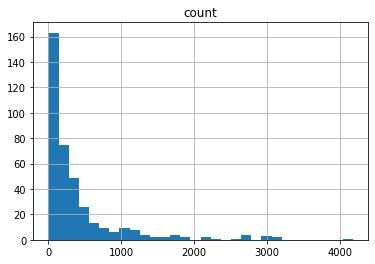

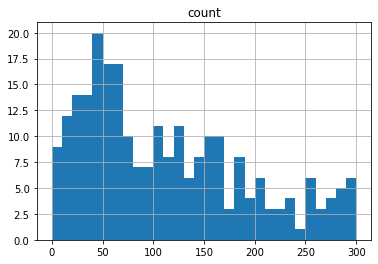

In [62]:
station_stat_full.hist('count', bins = 30)
station_stat_full.hist('count', bins = 30, range = (0, 300))

3.
Выберите из station_stat_full АЗС с количеством заездов более 30. По этим данным найдите для каждой сети медиану продолжительности заправки и число АЗС. Результат сохраните в good_stat2.
Дайте столбцам с медианой и количеством станций имена 'median_time' и 'stations'. Распечатайте первые 5 строк good_stat2.

In [63]:
good_stat2 = station_stat_full.query('count > 30').pivot_table(
    index='name', values='time_spent', aggfunc=['median', 'count']
)
good_stat2.columns = ['median_time','stations']
print(good_stat2.head(5))

          median_time  stations
name                           
Агератум       308.50         3
Амарант        169.00         5
Аммобиум       178.75         4
Арктотис       190.50         3
Астильба       435.50         4


4.
Объедините данные таблиц stat и good_stat2, чтобы получился датафрейм со столбцами: 'time_spent', 'good_time_spent', 'median_time', 'stations'. Результат сохраните в датафрейме final_stat. Распечатайте его целиком и просмотрите значения в столбцах 'good_time_spent' и 'median_time'.

In [64]:

good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)
print(final_stat)

             time_spent  good_time_spent  median_time  stations
name                                                           
Агератум     337.802721            309.0       308.50       3.0
Амарант      132.760012            187.5       169.00       5.0
Аммобиум     256.708042            180.5       178.75       4.0
Арктотис      73.879984            185.0       190.50       3.0
Астильба     376.143149            423.0       435.50       4.0
Бальзамин    134.508411            158.0       158.00       1.0
Бархатцы     145.300328            181.5       181.50       1.0
Бегония      163.200647            195.0       190.00       3.0
Белоцветник  100.818966            154.0       154.00       1.0
Василек      268.849897            264.0       252.00     103.0
Вербена      190.016594            199.0       199.75       6.0
Вероника     220.019402            212.0       223.00       5.0
Гацания      160.685185            178.5       178.50       1.0
Гвоздика     294.317308            229.0

# Диаграмма рассеяния

1. Постройте график по данным из station_stat_full, где для каждой АЗС будет отдельная точка: по горизонтальной оси — число заездов на АЗС, по вертикальной — медианное время заправки. Добавьте линии сетки.

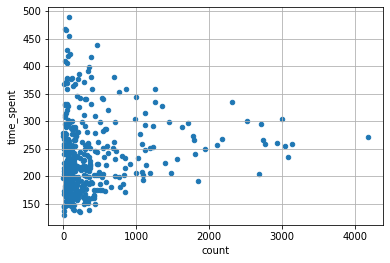

In [65]:
station_stat_full.plot(x='count', y='time_spent',kind='scatter', grid = True) 

# Корреляция

1. По данным из таблицы station_stat_full посчитайте коэффициент корреляции Пирсона между числом заездов на АЗС и временем заправки. Коэффициент выведите на экран.

In [66]:
print( station_stat_full ['count'].corr(station_stat_full ['time_spent']))

0.12242632473597156


# Матрица диаграмм рассеяния
К сожалению, нарисовать понятный график сразу для четырёх параметров нельзя. Однако можно построить диаграммы раcсеяния попарно для роста и веса, роста и возраста, веса и пола, веса и возраста (всего 16 вариантов). В Pandas такую задачу решают не df.plot(), а специальным методом: pd.plotting.scatter_matrix(df) (от англ. scatter matrix, «матрица рассеяния»).

1. Создайте переменную station_stat_multi, где для каждой АЗС будет 3 числа:
- среднее время (не медиана) заезда на АЗС;
- средняя доля быстрых заездов;
- средняя доля медленных заездов.
Затем выведите на экран матрицу корреляции между этими величинами. Постройте диаграмму рассеяния попарно для всех величин методом scatter_matrix. Задайте размер 9х9 дюймов.

            time_spent  too_fast  too_slow
time_spent    1.000000 -0.640658  0.802247
too_fast     -0.640658  1.000000 -0.255876
too_slow      0.802247 -0.255876  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc36169fd0>,
      dtype=object)

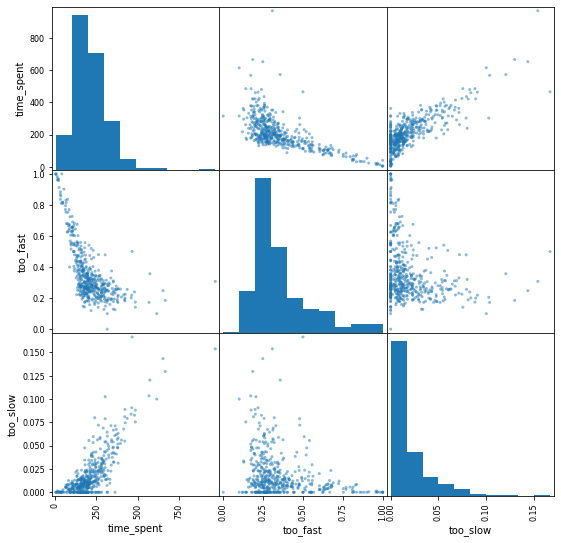

In [68]:
station_stat_multi = pd.pivot_table(data, index='id', values=['time_spent', 'too_fast', 'too_slow'])
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9, 9))

# Вывод

Самый большой коэффициент корреляции: 0,8 между 'too_slow' и 'time_spent'. Это заметно и на соответствующей диаграмме рассеяния. Зная одно значение, можно предсказать другое. Если бы мы не отрезали слишком долгие заезды, они бы сказались на среднем времени. Поэтому так важно было их отбросить и вместо среднего значения взять медиану.
Зависимость между 'too_fast' и 'time_spent' интереснее. На диаграмме рассеяния видно, что при too_fast>0.6 (т.е. более 60% заездов на АЗС продолжались меньше минуты), среднее время почти полностью определяется как раз долей этих быстрых заездов. Если бы мы их не отфильтровали, типичное время заправки напоминало бы пит-стоп на «Формуле-1».
Графики подтверждают, что двигаетесь вы верным путём и скоро возьмётесь за статистику, которая может открыть что-то новое. Но если в этот момент зайдут коллеги и спросят, чем вы занимаетесь, надо показать им отрубленные хвосты. Пусть они оценят вашу небольшую победу над хаосом.
Продемонстрируйте им два изображения: матрицу диаграмм рассеяния по исходным данным — и по отфильтрованным.

1. 
- Добавьте в таблицу station_stat_multi столбец 'good_time_spent' из данных good_station_stat.
- Распечатайте матрицу корреляции для station_stat_multi.
- Постройте диаграммы рассеяния попарно для всех величин методом scatter_matrix. Задайте размер 9х9 дюймов.

                 time_spent  too_fast  too_slow  good_time_spent
time_spent         1.000000 -0.640658  0.802247         0.702429
too_fast          -0.640658  1.000000 -0.255876        -0.315120
too_slow           0.802247 -0.255876  1.000000         0.445926
good_time_spent    0.702429 -0.315120  0.445926         1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc36245a90>,
      dtype=object)

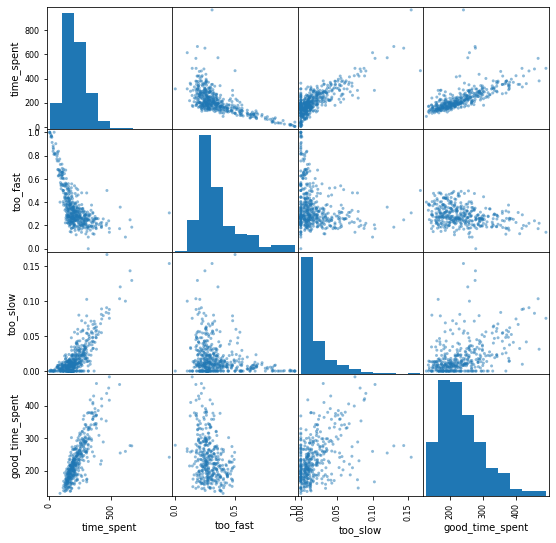

In [70]:
data['local_time'] = pd.to_datetime(
    data['date_time'], format='%Y-%m-%dT%H:%M:%S'
) + pd.Timedelta(hours=3)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = data.pivot_table(
    index='id', values='time_spent', aggfunc='median'
)
good_station_stat = good_data.pivot_table(
    index="id", values="time_spent", aggfunc="median"
)

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median'
)
stat['good_time_spent'] = good_stat['time_spent']

name_stat = data.pivot_table(index='name', values='time_spent')
good_name_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median'
)
name_stat['good_time_spent'] = good_name_stat['time_spent']

id_name = good_data.pivot_table(
    index='id', values='name', aggfunc=['first', 'count']
)
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)

good_stat2 = station_stat_full.query('count > 30').pivot_table(
    index='name', values='time_spent', aggfunc=['median', 'count']
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)

station_stat_multi = data.pivot_table(
    index='id', values=['time_spent', 'too_fast', 'too_slow']
)

station_stat_multi = pd.pivot_table(data, index='id', values=['time_spent', 'too_fast', 'too_slow'])
station_stat_multi[ 'good_time_spent'] = good_station_stat['time_spent']
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9, 9))

# Вывод
Хорошие новости: вы снизили влияние подозрительных данных на итоговый результат. Так, коэффициент корреляции между значениями 'too_fast' и 'good_time_spent' составляет -0.32. Хотя в сырых данных, без фильтрации, между значениями 'too_fast' и 'time_spent' было -0.64. Ещё почти вдвое уменьшили корреляцию в «медленной» области — от 0.8 между 'too_slow' и 'time_spent' до 0.45 в паре 'too_slow' — 'good_time_spent'.
Так себе новости: убрали не очень много долгих заправок. Возможно, ошибка не в данных, а на АЗС действительно не торопятся заправлять. Интересно, копуши работают во всех сетях равномерно или где-то плавность движений прописана в регламентах и поощряется премиями? Выясним в следующих уроках — нам поможет группировка.

1.
Постройте столбчатый график длительности заправки на каждой сети АЗС по наилучшей оценке — медиане, упорядочив сети по возрастанию времени. Задайте размер графика 10 на 5 дюймов.

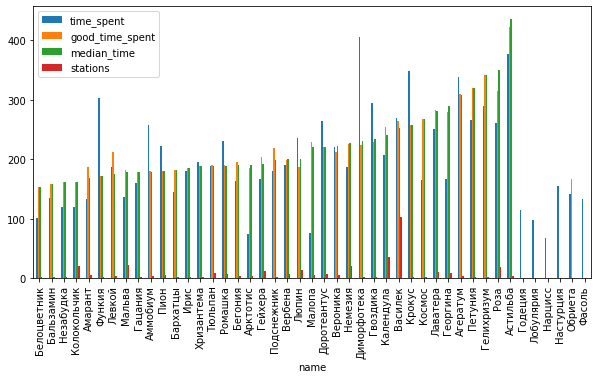

In [71]:
final_stat.sort_values(by = 'median_time').plot(kind='bar', figsize = (10, 5))

2.
Постройте столбчатый график медианной продолжительности заправки на каждой сети, упорядочив их по возрастанию времени. Пустые значения отбросьте методом dropna(). Задайте размер графика 10 на 5 дюймов. Добавьте линии сетки. Всё это сделайте в одно действие, не меняя переменную final_stat.

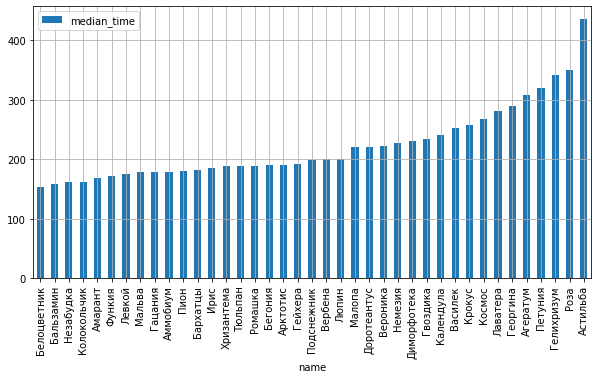

In [73]:
final_stat.dropna(subset=['median_time']).sort_values(by = 'median_time').plot(kind='bar',y = 'median_time', figsize = (10, 5), grid = True)

3.
Выявите самые крупные сети — постройте гистограмму числа АЗС внутри сетей. Поделите значения на 100 корзин. Все необходимые данные в таблице final_stat.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc34fa08d0>]],
      dtype=object)

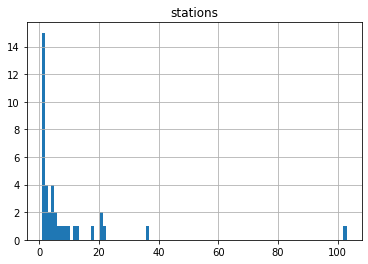

In [74]:
final_stat.hist(column = 'stations', bins = 100)

4.
Выберите из final_stat сети, в которых более 10 АЗС. Результат сохраните в таблице big_nets_stat. Выведите её на экран.

In [75]:
big_nets_stat = final_stat.query('stations > 10')
print(big_nets_stat)

             time_spent  good_time_spent  median_time  stations
name                                                           
Василек      268.849897            264.0       252.00     103.0
Гейхера      167.445947            204.0       192.00      12.0
Календула    207.357323            254.0       240.00      36.0
Колокольчик  119.131564            161.0       161.00      21.0
Люпин        235.440937            186.0       200.00      13.0
Мальва       136.562234            182.0       177.75      22.0
Немезия      186.535207            226.0       227.50      21.0
Роза         260.877217            315.0       350.00      18.0


5.
Создайте в station_stat_full новый столбец 'group_name', где для сетей АЗС из big_nets_stat названия останутся прежними, а имена остальных измените на 'Другие'. Распечатайте первые 5 строк station_stat_full.

In [76]:
station_stat_full['group_name'] = (
    station_stat_full['name']
    .where(station_stat_full['name'].isin(big_nets_stat.index), 'Другие')
)
print(station_stat_full.head(5))

                 name  count  time_spent   group_name
id                                                   
00ca1b70     Вероника    131       166.0       Другие
0178ce70      Василек    164       234.5      Василек
01abf4e9      Гацания     30       181.5       Другие
030a9067  Колокольчик    228       135.5  Колокольчик
03740f2d      Василек    157       289.0      Василек


6.
Соберите таблицу с потенциальными ключевыми партнёрами. Повторите знакомые вычисления, на этот раз группируя АЗС не по name, а по group_name.
Создайте переменную stat_grouped. Сперва сделайте срез по station_stat_full: выберите только те АЗС, на которых было более 30 заправок. Затем по этой выборке постройте сводную таблицу расчёта медианной продолжительности заправки: сгруппируйте по 'group_name', значением укажите 'time_spent', параметру aggfunc передайте список функций 'median' и 'count'.
Дайте имена 'time_spent' и 'count' новоиспечённым столбцам в stat_grouped.
Отсортируйте stat_grouped по возрастанию значений столбца 'time_spent'. Укажите параметр, необходимый для сохранения результатов сортировки в stat_grouped.
Распечатайте значения stat_grouped.

In [77]:
stat_grouped = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='group_name', values='time_spent', aggfunc = ['median', 'count'])
)
stat_grouped.columns = ['time_spent', 'count']
    
stat_grouped = stat_grouped.sort_values(by = 'time_spent', ascending=True)
print(stat_grouped)  

             time_spent  count
group_name                    
Колокольчик      161.00     21
Мальва           177.75     22
Гейхера          192.00     12
Люпин            200.00     13
Другие           208.75    104
Немезия          227.50     21
Календула        240.00     36
Василек          252.00    103
Роза             350.00     18


7.
Постройте круговую диаграмму с числом АЗС в каждой сети. Задайте ей размер 8x8 дюймов.

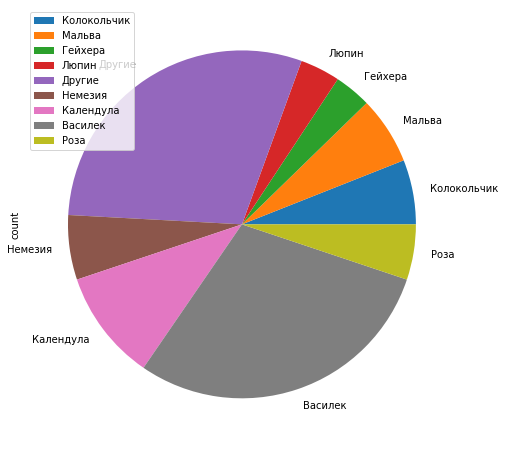

In [78]:
stat_grouped.plot(kind='pie', y = 'count', figsize = (8, 8))

# Разбитые по группам данные

1.
Создайте в good_data новый столбец 'group_name', где сетям из big_nets_stat оставьте их оригинальные имена, а остальные сети переименуйте на 'Другие'. Распечатайте первые 5 строк good_data.

In [80]:
good_data['group_name'] = (
    good_data['name']
    .where(good_data['name'].isin(big_nets_stat.index), 'Другие')
)

print(good_data.head(5))

            date_time        id  time_spent     name          local_time  \
0 2018-04-06 16:53:58  76144fb2        98.0  Василек 2018-04-06 19:53:58   
2 2018-04-03 17:28:24  76144fb2       220.0  Василек 2018-04-03 20:28:24   
6 2018-04-02 08:23:21  76144fb2       555.0  Василек 2018-04-02 11:23:21   
7 2018-04-07 00:34:08  76144fb2       286.0  Василек 2018-04-07 03:34:08   
9 2018-04-05 13:19:39  76144fb2       248.0  Василек 2018-04-05 16:19:39   

            date_hour  too_fast  too_slow group_name  
0 2018-04-06 20:00:00     False     False    Василек  
2 2018-04-03 20:00:00     False     False    Василек  
6 2018-04-02 11:00:00     False     False    Василек  
7 2018-04-07 04:00:00     False     False    Василек  
9 2018-04-05 16:00:00     False     False    Василек  


2.
Методом hist() постройте гистограмму продолжительности заправки для каждой сети отдельно (напомним, что все небольшие АЗС в общей группе "Другие"). Возьмите данные из good_data. Гистограмму разбейте на 50 корзин.

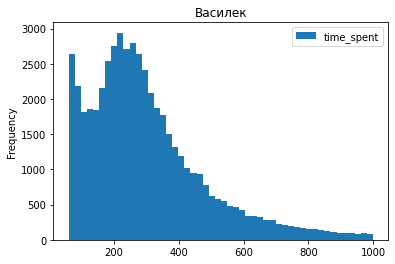

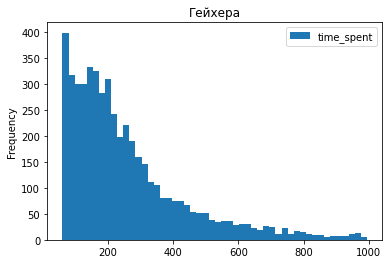

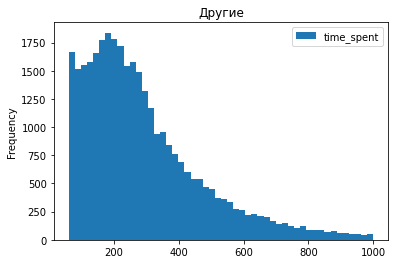

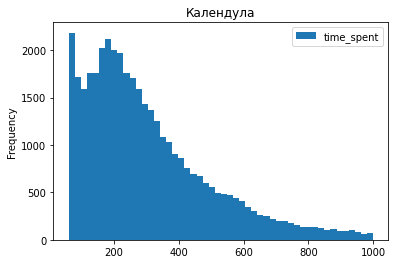

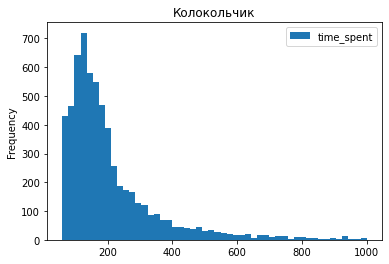

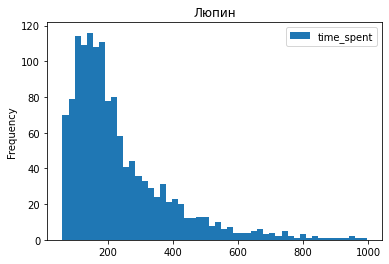

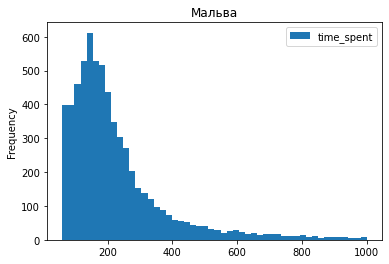

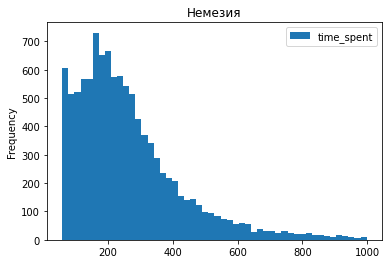

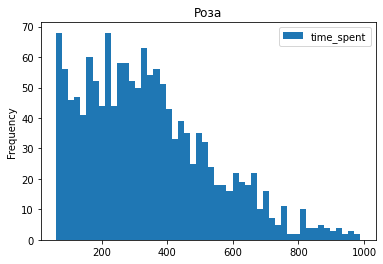

In [81]:
for group_name, group_data in good_data.groupby('group_name'):
    group_data.plot(kind='hist', y='time_spent', bins=50, title=group_name)

3.
Методом plot() c параметром kind='hist' постройте гистограмму продолжительности заправки для каждой сети отдельно (напомним, что все малые АЗС — в общей группе "Другие"). Возьмите данные из good_data. Столбец, по значениям которого гистограмму следует построить, передайте параметру y, а переменную с названиями графиков параметру title. Гистограмму разбейте на 50 корзин.

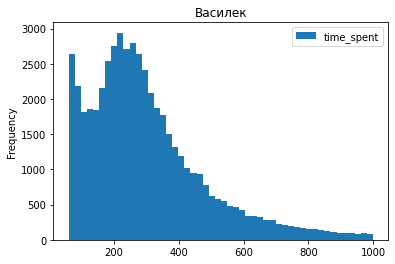

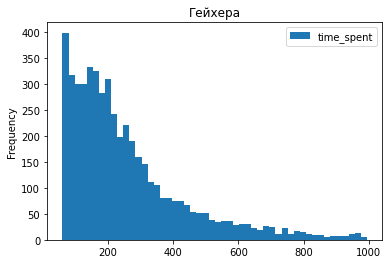

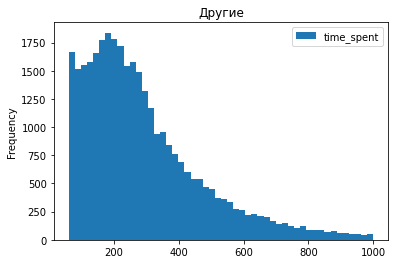

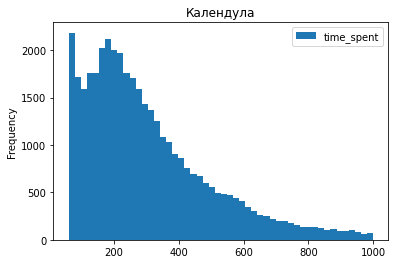

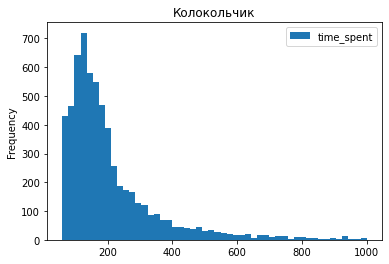

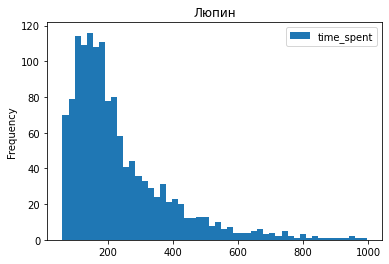

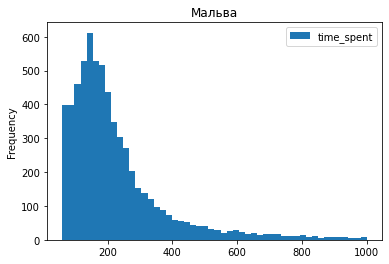

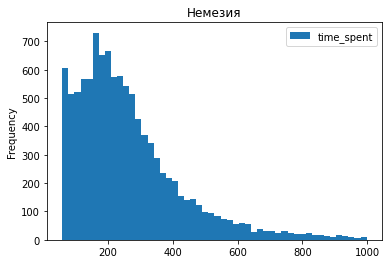

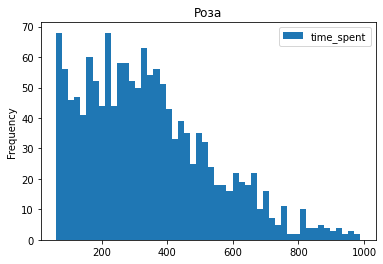

In [82]:
for name, group_data in good_data.groupby('group_name'):
    group_data.plot(kind='hist', y='time_spent', bins=50, title=name)

# Вывод
У многих сетей АЗС явно обнаруживается аномальный пик на коротких поездках. Но в основном распределение ожидаемой формы, а значит медиана хорошо передаёт характерное время заправки.
Вы действительно выявили много долгих заправок в самых медленных сетях АЗС («Роза», «Календула», «Василёк», «Намезия»). Причём форма распределения достаточно плавная: не походит на явную аномалию на продолжительных временах заправки.